# Parte 1b: Análisis de preguntas

## Importar librerías

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import folium
from folium.plugins import HeatMap
import seaborn as sns

## Pregunta 1: ¿Existe una relación entre el costo de vida y el poder adquisitivo local en los países más y menos densamente poblados?

In [5]:
# Cargar las tablas
cost_of_living = pd.read_csv('RefinedData/RefData_Cost_of_living_index_by_country_2020.csv')
population_density = pd.read_csv('RefinedData/RefData_Pupulation_density_by_countries.csv')
quality_of_life = pd.read_csv('RefinedData/RefData_Quality_of_life_index_by_countries_2020.csv')

In [9]:
# Combinar tablas y verificación de datos

#Se genera tabla con Nans
combined_Nan_df = cost_of_living.merge(population_density, on='Country', how='outer').merge(quality_of_life, on='Country', how='outer')

combined_Nan_df.head(10)

,Country,Cost of Living Index_x,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Rank,Area km2,Area mi2,...,Year,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index_y,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Afghanistan,24.24,4.03,14.58,17.70,17.38,28.20,128,645807.0,249347.0,...,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,36.39,8.55,23.07,28.39,26.75,29.56,84,28703.0,11082.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,30.10,5.34,18.26,30.71,15.89,28.69,168,2381741.0,919595.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,53,464.0,179.0,...,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,157,1246700.0,481354.0,...,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,40,442.0,171.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,32.95,8.33,21.17,25.82,30.52,47.22,173,2780400.0,1073518.0,...,2019.0,115.31,47.22,38.23,69.25,32.95,24.53,43.08,50.67,98.28
7,Armenia,32.84,10.91,22.35,25.61,30.43,28.00,87,29743.0,11484.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Australia,73.54,34.86,55.04,67.23,70.32,107.31,192,7692024.0,2969907.0,...,2020.0,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
9,Austria,70.38,26.81,49.54,61.73,68.09,82.38,76,83879.0,32386.0,...,2020.0,182.50,82.38,76.27,78.73,70.38,10.88,26.27,22.19,77.30


In [11]:
# Revisión de columnas 
combined_Nan_df.columns

Index(['Country', 'Cost of Living Index_x', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Rank',
       'Area km2', 'Area mi2', 'Population', 'Density pop./km2',
       'Density pop./mi2', 'Date', 'Population source', 'Day', 'Month', 'Year',
       'Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Cost of Living Index_y',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')

In [13]:
combined_Nan_df.shape

(205, 27)

In [15]:
combined_Nan_df.isnull().sum()

Country                             0
Cost of Living Index_x             74
Rent Index                         74
Cost of Living Plus Rent Index     74
Groceries Index                    74
Restaurant Price Index             74
Local Purchasing Power Index       74
Rank                                4
Area km2                            4
Area mi2                            4
Population                          4
Density pop./km2                    4
Density pop./mi2                    4
Date                                4
Population source                   4
Day                                 4
Month                               4
Year                                4
Quality of Life Index             125
Purchasing Power Index            125
Safety Index                      125
Health Care Index                 125
Cost of Living Index_y            125
Property Price to Income Ratio    125
Traffic Commute Time Index        125
Pollution Index                   125
Climate Inde

In [17]:
##Identificación de columnas, contenidos no nulos y tipo de dato 
combined_Nan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         205 non-null    object 
 1   Cost of Living Index_x          131 non-null    float64
 2   Rent Index                      131 non-null    float64
 3   Cost of Living Plus Rent Index  131 non-null    float64
 4   Groceries Index                 131 non-null    float64
 5   Restaurant Price Index          131 non-null    float64
 6   Local Purchasing Power Index    131 non-null    float64
 7   Rank                            201 non-null    object 
 8   Area km2                        201 non-null    float64
 9   Area mi2                        201 non-null    float64
 10  Population                      201 non-null    float64
 11  Density pop./km2                201 non-null    float64
 12  Density pop./mi2                201 

In [19]:
combined_Nan_df['Country'].duplicated().any()

False

In [21]:
combined_Nan_df['Density pop./km2'].describe()

count      201.000000
mean       437.255721
std       2090.089438
min          1.900000
25%         34.000000
50%         82.000000
75%        208.000000
max      20550.000000
Name: Density pop./km2, dtype: float64

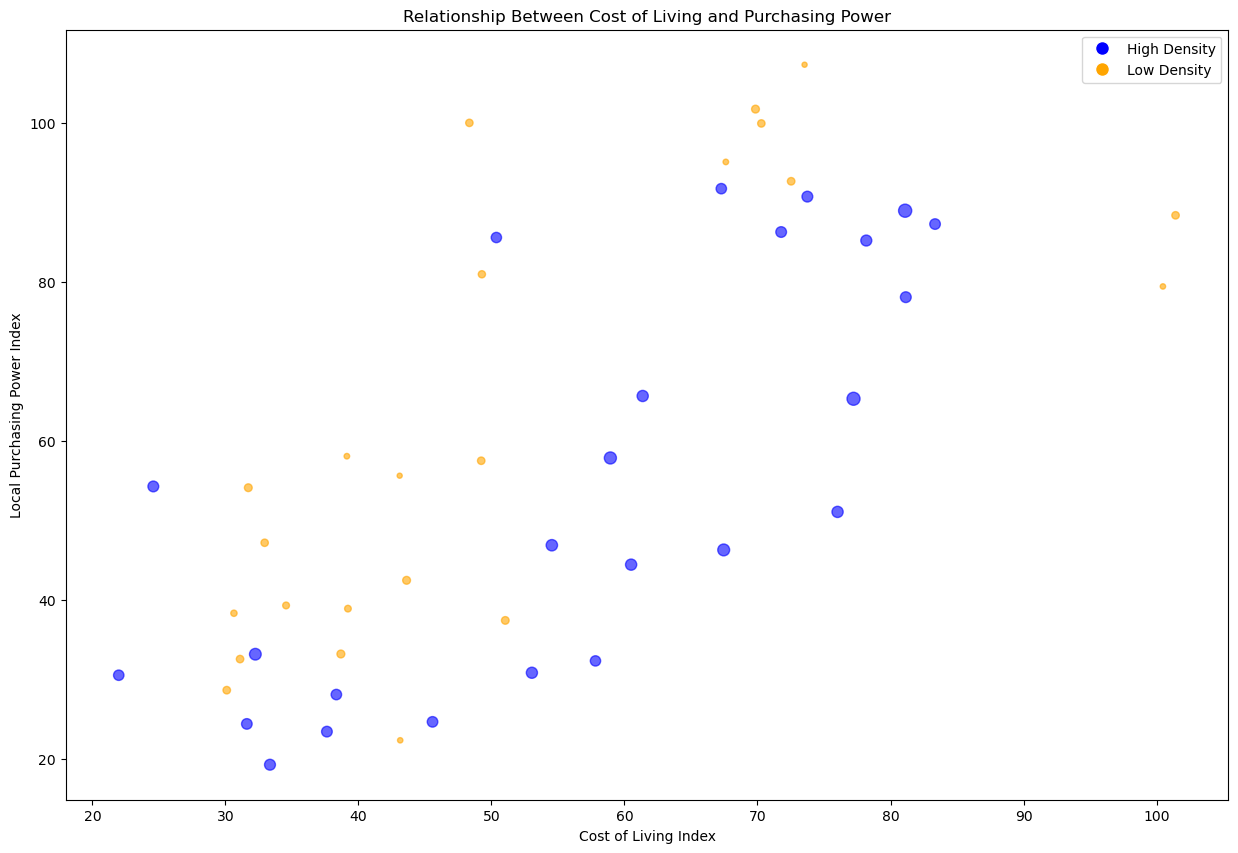

In [23]:
# Obtención de quintiles y visualización

# Filtrar quintiles
q_high = combined_Nan_df['Density pop./km2'].quantile(0.8)
q_low = combined_Nan_df['Density pop./km2'].quantile(0.2)

high_density = combined_Nan_df[combined_Nan_df['Density pop./km2'] >= q_high]
low_density = combined_Nan_df[combined_Nan_df['Density pop./km2'] <= q_low]

# Generación de los elementos de la leyenda del gráfico
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='High Density',
           markerfacecolor='blue', markersize=10),  # Personaliza el tamaño y color
    Line2D([0], [0], marker='o', color='w', label='Low Density',
           markerfacecolor='orange', markersize=10)  # Personaliza el tamaño y color
]

# Visualización
plt.figure(figsize=(15, 10))
'''
plt.scatter(high_density['Cost of Living Index_x'], high_density['Local Purchasing Power Index'],
            s=high_density['Density pop./km2'], alpha=0.6, label='High Density', color='blue')

plt.scatter(low_density['Cost of Living Index_x'], low_density['Local Purchasing Power Index'],
            s=low_density['Density pop./km2'], alpha=0.6, label='Low Density', color='orange')
'''

plt.scatter(high_density['Cost of Living Index_x'], high_density['Local Purchasing Power Index'],
            s=np.log1p(high_density['Density pop./km2'])*10, alpha=0.6, label='High Density', color='blue')

plt.scatter(low_density['Cost of Living Index_x'], low_density['Local Purchasing Power Index'],
            s=np.log1p(low_density['Density pop./km2'])*10, alpha=0.6, label='Low Density', color='orange')


plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.title('Relationship Between Cost of Living and Purchasing Power')


# Añadir la leyenda personalizada
plt.legend(handles=legend_elements)  # Cambia la posición si es necesario

plt.show()

In [ ]:
'''Se hace la prueba de la gráfica con la los datos sin NAN para ver cómo sale

combined_df = cost_of_living.merge(population_density, on='Country').merge(quality_of_life, on='Country')

# Filtrar quintiles
q_high = combined_df['Density pop./km2'].quantile(0.8)
q_low = combined_df['Density pop./km2'].quantile(0.2)

high_density = combined_df[combined_df['Density pop./km2'] >= q_high]
low_density = combined_df[combined_df['Density pop./km2'] <= q_low]

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(high_density['Cost of Living Index_x'], high_density['Local Purchasing Power Index'],
            s=high_density['Density pop./km2'], alpha=0.6, label='High Density')
plt.scatter(low_density['Cost of Living Index_x'], low_density['Local Purchasing Power Index'],
            s=low_density['Density pop./km2'], alpha=0.6, label='Low Density')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.title('Relationship Between Cost of Living and Purchasing Power')
plt.legend()
plt.show()

'''


In [25]:
#Extraigo la tabla que se usó para graficar

# Primero combino las tablas high_density y low_density
pregunta1data= pd.concat([high_density, low_density])

# Visualizar la tabla resultante
pregunta1data.head(10)



,Country,Cost of Living Index_x,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Rank,Area km2,Area mi2,...,Year,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index_y,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
12,Bahrain,58.94,30.95,45.55,48.11,54.55,57.88,4,778.0,300.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Bangladesh,32.25,5.01,19.22,29.72,19.21,33.21,7,143998.0,55598.0,...,2020.0,70.03,33.21,36.06,42.80,32.25,13.10,56.73,86.21,71.29
14,Barbados,76.02,19.70,49.08,65.20,68.14,51.10,9,430.0,166.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Belgium,71.78,25.43,49.61,58.66,80.14,86.28,22,30689.0,11849.0,...,2020.0,153.47,86.28,56.02,74.34,71.78,6.91,36.15,52.94,85.99
28,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,20,27816.0,10740.0,...,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,15,1861.0,719.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,El Salvador,45.57,13.48,30.22,43.67,34.80,24.71,26,21040.0,8124.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Grenada,NaN,NaN,NaN,NaN,NaN,NaN,27,344.0,133.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Haiti,NaN,NaN,NaN,NaN,NaN,NaN,17,27065.0,10450.0,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Hong Kong,77.22,79.57,78.35,75.94,54.36,65.32,–,1106.0,427.0,...,2019.0,99.05,65.32,79.30,66.08,77.22,47.46,41.46,67.69,83.64


In [ ]:
# Guardo la tabla en un archivo CSV
pregunta1data.to_csv('AnalisisPreguntas/pregunta1data.csv', index=False)

### Análisis y conslusión de los resultados

In [ ]:
'''
Como tendencia general, puede decirse que existe una relación positiva entre el índice de costo de vida y el índice de poder adquisitivo. 
Esto significa que, en general, los países con un alto costo de vida también tienden a tener un mayor poder adquisitivo. Esto puede deberse 
a que economías más desarrolladas tienen tanto costos como ingresos altos.

Los países con alta densidad poblacional parecen estar concentrados en la parte superior derecha de la gráfica (alto costo de vida y alto poder
adquisitivo). Esto podría indicar que las áreas densamente pobladas tienden a ser económicamente activas y con ingresos elevados, pero también 
más caras para vivir. 

Los países con baja densidad están distribuidos en diferentes regiones de la gráfica. Algunos tienen un costo de vida bajo y un poder adquisitivo
bajo, mientras que otros tienen un poder adquisitivo más alto en relación con su costo de vida.

Los países de alta densidad tienden a estar mejor representados en la esquina superior derecha de la gráfica (alto costo y poder adquisitivo),
mientras que los países de baja densidad parecen tener una mayor dispersión, lo que sugiere que la relación costo-poder adquisitivo es más variada
en estos países.

Aunque la densidad no parece tener un impacto directo sobre la relación entre costo de vida y poder adquisitivo, es notable que los países más 
densamente poblados tienden a concentrarse en la parte más alta de la gráfica en ambos índices.

La gráfica respalda la hipótesis de que, en general, los países con un alto costo de vida también tienen un alto poder adquisitivo. Sin embargo, 
la densidad poblacional introduce variaciones interesantes, ya que los países de baja densidad presentan más diversidad en la relación entre estos
dos índices. Para profundizar en este resultado, podría realizarse un análisis de correlaciones o tendencias separadas para los grupos de alta y 
baja densidad, o analizar los países atípicos (puntos alejados de la tendencia principal).
'''

## Pregunta 2: ¿Cómo varía la distribución de edades en países con diferentes niveles de calidad de vida?

In [5]:
# Cargar tabla
age_distribution = pd.read_csv('RefinedData/RefData_Coutries_age_structure.csv')  

In [29]:
# Combinar tablas y verificar datos
merged_NAN_df = pd.merge(age_distribution, quality_of_life, on='Country', how='outer')

merged_NAN_df.head(10)

,Country,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Afghanistan,43.2,54.2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,17.4,68.9,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,29.3,64.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,46.8,50.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,23.9,69.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Argentina,24.9,63.9,11.0,115.31,47.22,38.23,69.25,32.95,24.53,43.08,50.67,98.28
6,Armenia,20.0,68.8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Australia,19.0,65.5,16.0,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
8,Austria,14.1,66.7,19.0,182.50,82.38,76.27,78.73,70.38,10.88,26.27,22.19,77.30
9,Azerbaijan,23.3,70.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
merged_NAN_df.columns

Index(['Country', 'Age 0 to 14 Years', 'Age 15 to 64 Years',
       'Age above 65 Years', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')

In [33]:
merged_NAN_df.shape

(187, 13)

In [35]:
merged_NAN_df.duplicated().any()

False

In [37]:
merged_NAN_df.isnull().sum()

Country                             0
Age 0 to 14 Years                   1
Age 15 to 64 Years                  1
Age above 65 Years                  1
Quality of Life Index             107
Purchasing Power Index            107
Safety Index                      107
Health Care Index                 107
Cost of Living Index              107
Property Price to Income Ratio    107
Traffic Commute Time Index        107
Pollution Index                   107
Climate Index                     107
dtype: int64

In [39]:
#Realizo una descripcion de los datos para conocer más profundamente la naturaleza de la tabla obtenida
print(merged_NAN_df['Quality of Life Index'].describe())

count     80.000000
mean     134.100375
std       33.921748
min       55.650000
25%      106.377500
50%      132.755000
75%      162.395000
max      192.670000
Name: Quality of Life Index, dtype: float64


Quality Life Range
Medium    38
High      30
Low       12
Name: count, dtype: int64


C:\Users\Estew\AppData\Local\Temp\ipykernel_29148\2624040319.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means =merged_NAN_df.groupby('Quality Life Range')[['Age 0 to 14 Years', 'Age 15 to 64 Years', 'Age above 65 Years']].mean()


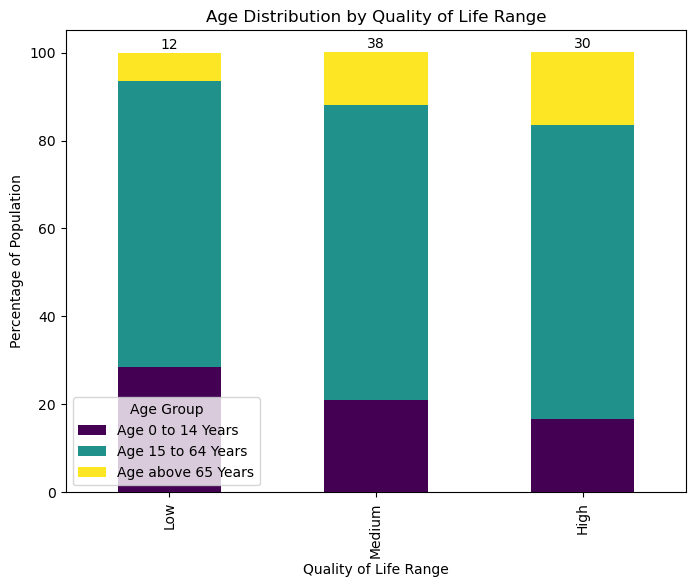

In [41]:
#Construcción de datos para graficar a partir del estudio realizado

# Agrupar por rangos de calidad de vida
#merged_NAN_df['Quality Life Range'] = pd.cut(merged_NAN_df['Quality of Life Index'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])

merged_NAN_df['Quality Life Range'] = pd.cut(merged_NAN_df['Quality of Life Index'], bins=[55, 100, 150, 200], labels=['Low', 'Medium', 'High'])

#Verifico los nuevos rangos
print(merged_NAN_df['Quality Life Range'].value_counts())

# Promedios por rango
age_means =merged_NAN_df.groupby('Quality Life Range')[['Age 0 to 14 Years', 'Age 15 to 64 Years', 'Age above 65 Years']].mean()


# Calcular el número total de países por rango
totals = merged_NAN_df['Quality Life Range'].value_counts().reindex(['Low', 'Medium', 'High'])

# Gráfico de barras apiladas
ax = age_means.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

# Agregar etiquetas en la parte superior de las barras
for i, total in enumerate(totals):
    ax.text(i, age_means.iloc[i].sum() + 1,  # La posición Y está justo encima del total de cada barra
            str(total),                      # El texto muestra el total de países
            ha='center',                     # Centrar el texto horizontalmente
            fontsize=10,                     # Tamaño de fuente
            color='black')                   # Color del texto

# Personalización del gráfico
plt.xlabel('Quality of Life Range')
plt.ylabel('Percentage of Population')
plt.title('Age Distribution by Quality of Life Range')
plt.legend(title='Age Group')
plt.show()


In [43]:
#Preparo los datos para extraer la tabla que se usó en el gráfico

age_meansCopy = age_means.copy()

age_meansCopy['Country Count'] = totals

# Visualizar la tabla resultante
age_meansCopy.head(10)



,Age 0 to 14 Years,Age 15 to 64 Years,Age above 65 Years,Country Count
Quality Life Range,,,,
Low,28.591667,64.850000,6.5,12
Medium,20.924865,67.157297,12.0,38
High,16.756667,66.876667,16.4,30


In [ ]:
# Guardo la tabla en un archivo CSV
age_meansCopy.to_csv('AnalisisPreguntas/pregunta2data.csv', index=True)

### Análisis y conslusión de los resultados

In [ ]:
'''
Al observar la figura 10 vemos que en la distribución de la población, el grupo predominante en todos los rangos son 
las edades entre los 15 y 64 años (verde), lo cual tiene sentido ya que corresponde a la población económicamente activa. 
Por otro lado los grupos de 0 a 14 años (morado) y mayores de 65 (amarillo) representan proporciones menores, siendo los
mayores de 65 años el segmento más reducido.

Al pasar a la diferencia entre rangos, vemos que a medida que aumenta la calidad de vida la proporción de personas mayores
de 65 tiende a crecer. Esto es consistente con la expectativa de que una mayor calidad de vida se asocia con una mayor 
esperanza de vida. A su vez, la proporción de personas jóvenes (0 a 14 años) disminuye, lo que puede estar relacionado 
con menores tasas de natalidad en países con alta calidad de vida. Por último, la población entre 15 y 64 años se mantiene
estable, aunque con ligeras variaciones.

A modo de conclusión, podría decirse que el gráfico ilustra cómo la composición etaria varía con los rangos de calidad de 
vida. Países con mejor calidad de vida tienen una población más envejecida, mientras que aquellos con menor calidad de vida 
tienen más personas jóvenes y menos personas mayores. Esto refleja dinámicas demográficas y económicas relacionadas con el 
desarrollo social y económico.

'''

## Pregunta 3: ¿Qué países ofrecen el mejor balance entre costo de vida y calidad de vida?

In [125]:
# Combinar tablas y verificar datos

balance_df = pd.merge(quality_of_life, cost_of_living, on ='Country', how='outer') 

balance_df.head(10)

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index_x,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Index_y,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.24,4.03,14.58,17.70,17.38,28.20
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.39,8.55,23.07,28.39,26.75,29.56
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.10,5.34,18.26,30.71,15.89,28.69
3,Argentina,115.31,47.22,38.23,69.25,32.95,24.53,43.08,50.67,98.28,32.95,8.33,21.17,25.82,30.52,47.22
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.84,10.91,22.35,25.61,30.43,28.00
5,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70,73.54,34.86,55.04,67.23,70.32,107.31
6,Austria,182.50,82.38,76.27,78.73,70.38,10.88,26.27,22.19,77.30,70.38,26.81,49.54,61.73,68.09,82.38
7,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.92,9.48,20.15,23.74,30.36,30.20
8,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.51,36.36,60.43,62.65,83.66,54.18
9,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.94,30.95,45.55,48.11,54.55,57.88


In [127]:
balance_df.columns

Index(['Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index_x',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'Cost of Living Index_y',
       'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [129]:
balance_df.shape

(131, 16)

In [131]:
balance_df.duplicated().any()

False

In [133]:
balance_df.isnull().sum()

Country                            0
Quality of Life Index             51
Purchasing Power Index            51
Safety Index                      51
Health Care Index                 51
Cost of Living Index_x            51
Property Price to Income Ratio    51
Traffic Commute Time Index        51
Pollution Index                   51
Climate Index                     51
Cost of Living Index_y             0
Rent Index                         0
Cost of Living Plus Rent Index     0
Groceries Index                    0
Restaurant Price Index             0
Local Purchasing Power Index       0
dtype: int64

In [135]:
print(balance_df['Quality of Life Index'].describe())

count     80.000000
mean     134.100375
std       33.921748
min       55.650000
25%      106.377500
50%      132.755000
75%      162.395000
max      192.670000
Name: Quality of Life Index, dtype: float64


In [137]:


import os
from bokeh.io import output_notebook, show, output_file, save
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from difflib import get_close_matches

# Activar salida en notebook 
output_notebook()

# Configuración para lectura de shapefiles
os.environ["SHAPE_RESTORE_SHX"] = "YES"


# Creo una copia del balance_df y genero en esta copia una nueva columna "Balance Score"

country_balance_df=balance_df.copy()
country_balance_df['Balance Score'] = country_balance_df['Quality of Life Index'] - country_balance_df['Cost of Living Index_x']

# Ruta al shapefile del mundo
shapefile_path = "AuxiliarData/ne_110m_admin_0_countries.shp"

# Cargo el shapefile y estandarizar nombres de países
world = gpd.read_file(shapefile_path)

#Me aseguro que el campo admin tenga los paieses en el archivo shapefile
print(world.columns)
print(world['ADMIN'])




Loading BokehJS ...

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
0                             Fiji
1      United Republic of Tanzania
2                   Western Sahara
3                           Canada
4         United States of America
                  ...             
172             Republic of Serbia
173                     Montenegro
174                         Kosovo
175            Trinidad and Tobago
176                    South Sudan
Name: ADMIN, Length: 177, dtype: object


In [139]:
# Establecer el CRS si no está definido
if world.crs is None:
    world.set_crs(epsg=4326, inplace=True)  # Establecer WGS84 como CRS predeterminado

# Estandarizar nombres
world['ADMIN'] = world['ADMIN'].str.lower()
country_balance_df['Country'] = country_balance_df['Country'].str.lower()


# Crear diccionario de mapeo manual para nombres no coincidentes
manual_corrections = {
    "united states": "united states of america",
    "viet nam": "vietnam",
    "macao": "macau",
}

# Corregir nombres en el DataFrame country_balance_df
country_balance_df['Country Corrected'] = country_balance_df['Country'].replace(manual_corrections)

# Identificar países restantes sin coincidencia
countries_in_world = world['ADMIN'].unique()
countries_in_balance = country_balance_df['Country Corrected'].unique()

non_matching_countries = set(countries_in_balance) - set(countries_in_world)
correction_dict = {}
for country in non_matching_countries:
    closest_match = get_close_matches(country, countries_in_world, n=1)
    correction_dict[country] = closest_match[0] if closest_match else None

# Aplicar correcciones automáticas al DataFrame
country_balance_df['Country Corrected'] = country_balance_df['Country Corrected'].replace(correction_dict)


# Merge entre shapefile y balance_df
merged_df = world.merge(country_balance_df, left_on='ADMIN', right_on='Country Corrected', how='left')

# Asegurar que el GeoDataFrame resultante tenga un CRS definido
if merged_df.crs is None:
    merged_df.set_crs(epsg=4326, inplace=True)

# Contar países con datos y sin datos
countries_with_data = merged_df[~merged_df['Balance Score'].isna()]['ADMIN'].nunique()
countries_without_data = merged_df[merged_df['Balance Score'].isna()]['ADMIN'].nunique()

# Imprimir resultados
print(f"Países con datos en el mapa: {countries_with_data}")
print(f"Países sin datos en el mapa: {countries_without_data}")

# Convertir a GeoJSON para Bokeh
geojson_data = merged_df.to_json()
geo_source = GeoJSONDataSource(geojson=geojson_data)

# Configurar el mapeo de colores
color_mapper = LinearColorMapper(palette="Viridis256", low=merged_df['Balance Score'].min(), high=merged_df['Balance Score'].max())

# Crear figura Bokeh
p3 = figure(title="Balance entre Calidad de Vida y Costo de Vida", 
           width=900, height=600, 
           tools="pan,wheel_zoom,box_zoom,reset", 
           toolbar_location="right")

# Agregar geometría al mapa
p3.patches('xs', 'ys', source=geo_source, 
          fill_color={'field': 'Balance Score', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

# Agregar herramienta de hover
hover = HoverTool()
hover.tooltips = [
    ("País", "@ADMIN"), 
    ("Balance Score", "@{Balance Score}"),
    ("Índice de Calidad de Vida", "@{Quality of Life Index}"),
    ("Índice de Costo de Vida", "@{Cost of Living Index_x}")
]
p3.add_tools(hover)

# Agregar barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, width=8, location=(0, 0))
p3.add_layout(color_bar, 'right')

# Mostrar el gráfico
show(p3)


# Configuración del archivo de salida HTML
output_file("AnalisisPreguntas/Pregunta3grafica.html")

# Guardar la figura en el archivo
save(p3)


Países con datos en el mapa: 78
Países sin datos en el mapa: 101


'C:\\Users\\Estew\\estudioPaisesGRebo\\AnalisisPreguntas\\Pregunta3grafica.html'

In [257]:
# Exportar datos usados para mapa geográfico

# Reproyectar a un CRS proyectado (por ejemplo, World Mercator)
merged_df = merged_df.to_crs(epsg=3857)  

# Calcular los centroides con el CRS proyectado
merged_df['latitude'] = merged_df.geometry.centroid.y
merged_df['longitude'] = merged_df.geometry.centroid.x

# Volver al CRS original (geográfico)
merged_df = merged_df.to_crs(epsg=4326)  # EPSG:4326 es WGS84 (geográfico)

# Seleccionar columnas relevantes
columns_to_export = [
    'ADMIN',  # País
    'Balance Score', 
    'Quality of Life Index', 
    'Cost of Living Index_x', 
    'latitude', 
    'longitude'
]

export_df = merged_df[columns_to_export]

# Renombro la columna 'ADMIN' a 'Country'
export_df = export_df.rename(columns={'ADMIN': 'Country'})

export_df.head(10)

,Country,Balance Score,Quality of Life Index,Cost of Living Index_x,latitude,longitude
0,fiji,NaN,NaN,NaN,-1.958098e+06,1.824878e+07
1,united republic of tanzania,NaN,NaN,NaN,-7.003071e+05,3.869296e+06
2,western sahara,NaN,NaN,NaN,2.794163e+06,-1.348403e+06
3,canada,95.85,163.47,67.62,1.044422e+07,-1.079779e+07
4,united states of america,101.06,172.11,71.05,6.667416e+06,-1.329713e+07
5,kazakhstan,57.67,88.31,30.64,6.185359e+06,7.493752e+06
6,uzbekistan,NaN,NaN,NaN,5.135220e+06,7.026619e+06
7,papua new guinea,NaN,NaN,NaN,-7.208118e+05,1.617688e+07
8,indonesia,60.20,97.47,37.27,-2.487479e+05,1.307244e+07
9,argentina,82.36,115.31,32.95,-4.397998e+06,-7.282320e+06


In [259]:
# Guardar como CSV
output_path = "AnalisisPreguntas/Pregunta3data.csv"
export_df.to_csv(output_path, index=False)

print(f"Archivo exportado: {output_path}")

Archivo exportado: AnalisisPreguntas/Pregunta3data.csv


### Análisis y conclusiones

In [ ]:
'''
A partir de los datos obtenidos podemos observar que Europa occidental y Escandinavia parecen tener un balance 
relativamente alto según la escala y colores del heatmap. Latinoamérica y África muestran un balance más variado, 
con algunos países en azul y otros con datos faltantes. Por último, Asia y Oceanía tienen un rango diverso de 
balances, pero algunos países destacan con valores altos.

El mapa es útil para comparar rápidamente las condiciones de vida relativas entre los países, pero tiene 
ciertas limitaciones. Una de ellas es la limitación en los datos, los paíes sin datos deben ser considerados 
para interpretar el mapa en su contexto global. Por otro lado, tampoco se especifican causas, por lo que no 
se poseen los factores contribuyentes al balance en cada país (como políticas económicas, salud, educación, etc.)


'''

## Pregunta 4: ¿Qué impacto tienen los índices de seguridad y crimen en el costo de vida?

In [8]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, show, output_file, save
from bokeh.models import ColorBar, LinearColorMapper
import pandas as pd


#Leo el archivo que me falta para el merge

crime_safe = pd.read_csv('RefinedData/RefData_Crime_index_by_countries_2020.csv')  

#Obtengo tabla merge a partir de cost_of_living y crime_safe

cost_of_living_crime_safe = pd.merge(cost_of_living, crime_safe, on='Country')

print(cost_of_living_crime_safe.shape)
cost_of_living_crime_safe.head(10)



(122, 9)


,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Crime Index,Safety Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53,21.60,78.40
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38,35.43,64.57
2,Iceland,100.48,46.95,74.88,86.89,113.74,79.44,23.36,76.64
3,Japan,83.35,25.97,55.90,81.82,48.95,87.28,20.66,79.34
4,Denmark,83.00,31.92,58.57,61.74,100.75,100.88,25.10,74.90
5,Bahamas,82.51,36.36,60.43,62.65,83.66,54.18,62.86,37.14
6,Luxembourg,81.89,54.92,68.99,69.10,89.85,103.92,33.39,66.61
7,Israel,81.15,31.33,57.32,66.31,88.65,78.09,29.60,70.40
8,Singapore,81.10,63.27,72.58,66.75,58.99,88.96,30.57,69.43
9,South Korea,78.18,22.86,51.72,91.31,44.87,85.21,28.02,71.98


In [ ]:
#Gráfico con los índices de criminalidad y costo de vida en los ejes de la gráfica de dispersión
'''# Configuración de colores basada en Safety Index
color_mapper2 = LinearColorMapper(palette="Viridis256", low=cost_of_living_crime_safe['Cost of Living Index'].min(), high=cost_of_living_crime_safe['Cost of Living Index'].max())

# Crear la figura
p2 = figure(
    title="Impacto de los Índices de Seguridad y Crimen en el Costo de Vida",
    x_axis_label="Crime Index",
    y_axis_label="Safety Index",
    tools="pan,box_zoom,reset,save",
    width=600,
    height=600,
)

# Añadir puntos al gráfico
p2.scatter(
    x='Crime Index',
    y='Safety Index',
    size=15,
    color={'field': 'Cost of Living Index', 'transform': color_mapper2},
    source=cost_of_living_crime_safe,
)

# Añadir la barra de color
color_bar2 = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0, 0), title="Safety Index")
p2.add_layout(color_bar, 'right')

# Mostrar gráfico
output_notebook()
show(p2)'''

In [267]:

#df = pd.DataFrame(data)

# Configuración de colores basada en Safety Index
color_mapper = LinearColorMapper(palette="Viridis256", low=cost_of_living_crime_safe['Safety Index'].min(), high=cost_of_living_crime_safe['Safety Index'].max())

# Crear la figura
p4 = figure(
    title="Impacto de los Índices de Seguridad y Crimen en el Costo de Vida",
    x_axis_label="Crime Index",
    y_axis_label="Cost of Living Index",
    tools="pan,box_zoom,reset,save",
    width=600,
    height=600,
)

# Añadir puntos al gráfico
p4.scatter(
    x='Crime Index',
    y='Cost of Living Index',
    size=15,
    color={'field': 'Safety Index', 'transform': color_mapper},
    source=cost_of_living_crime_safe,
)

# Añadir la barra de color
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0, 0), title="Safety Index")
p4.add_layout(color_bar, 'right')

# Mostrar gráfico
output_notebook()
show(p4)

Loading BokehJS ...

In [271]:
# Exportar datos usados para grafico de dispersión indice criminalidad y seguridad

# Seleccionar columnas relevantes
columns_to_export_crime_safe = [
    'Country',
    'Cost of Living Index', 
    'Safety Index',
     'Crime Index',
]
export_crime_safe_df = cost_of_living_crime_safe[columns_to_export_crime_safe]

export_crime_safe_df.head(10)


,Country,Cost of Living Index,Safety Index,Crime Index
0,Switzerland,122.40,78.40,21.60
1,Norway,101.43,64.57,35.43
2,Iceland,100.48,76.64,23.36
3,Japan,83.35,79.34,20.66
4,Denmark,83.00,74.90,25.10
5,Bahamas,82.51,37.14,62.86
6,Luxembourg,81.89,66.61,33.39
7,Israel,81.15,70.40,29.60
8,Singapore,81.10,69.43,30.57
9,South Korea,78.18,71.98,28.02


In [289]:
# Guardar como CSV
output_path_crime_safe = "AnalisisPreguntas/Pregunta4data.csv"
export_crime_safe_df.to_csv(output_path_crime_safe, index=False)

print(f"Archivo exportado: {output_path_crime_safe}")

Archivo exportado: AnalisisPreguntas/Pregunta4data.csv


### Análisis y Conclusiones

In [ ]:
'''
Al analizar el gráfico, a primera vista no parece haber una relación fuerte y directa entre el índice de criminalidad
y el costo de vida. Dicho lo anterior, sí es verdad que algunos países con índices de criminalidad bajos 
(menores a 20) tienden a tener costos de vdia altos, hay una gran dispersión en los valores para índices de 
criminalidad entre 20 y 60. Además, países con índices de criminalidad altos (superiores a 60) no necesariamente
tienen costo de vdia bajos, ya que algunos se distribuyen en diferentes rangos de costo. 

Cuando se observa el impacto del índice de seguridad se aprecia que un índice bajo (azul a morado) tiende a estar
asociado con países donde el costo de vida es más bajo, mientras que países con índices de seguridad altos (amarillo
a verde claro) tienden a ubicarse más hacia la mitad o el tercio superior del costo de vida. Esto sugiere que la 
seguridad puede tener un leve impacto positivo en el costo de vida, ya que países más seguros suelen tener mayores
costos de vida. 

La mayoría de los países se concentran en un rango medio de criminalidad (entre 20 y 60) y costos de vida moderados
(entre 30 y 80). Existen algunos valores atípicos donde países con índices de criminalidad bajos presentan costos de
vida extremadamente altos, lo que podría corresponder a economías desarrolladas con altos niveles de seguridad (por 
ejemplo, países escandinavos o similares)

A partir de las observaciones anteriores, podemos inferir que la relación entre el Cost of Living Index y el 
Crime Index no es lineal ni claramente fuerte. Esto implica que otros factores externos, como el desarrollo 
económico, la infraestructura, o las políticas gubernamentales, podrían tener un mayor impacto en el costo de vida. 
Por otro lado, el Safety Index parece tener una correlación más notable, donde países más seguros tienden a tener 
costos de vida más altos, aunque esto no es una regla universal. Al analizar los patrones de coloración parece ser 
que países con índices de criminalidad extremadamente bajos tienen una mayor probabilidad de tener costos de vida 
altos, mientras que los países con costos de vida muy bajos suelen presentar índices de seguridad bajos. Tratando 
de fundamentar lo anterior, podría pensarse que los países más desarrollados económicamente suelen tener mayores 
costos de vida y mejores índices de seguridad, ya que invierten más en sistemas de justicia, educación, y bienestar 
social. Por el contrario, en países menos desarrollados, un costo de vida bajo puede estar asociado con mayores 
niveles de criminalidad y menor seguridad.

'''

## Pregunta 5: ¿Cómo varía la calidad del sistema de salud según la densidad poblacional?

In [11]:
#Leo el archivo que me falta para el merge

health_care = pd.read_csv('RefinedData/RefData_Health_care_index_by_countries_2020.csv')  

#Obtengo tabla merge a partir de population_density y health_care

health_care_population_density = pd.merge(population_density, health_care, on='Country')

print(health_care_population_density.shape)
health_care_population_density.head(10)


(90, 14)


,Rank,Country,Area km2,Area mi2,Population,Density pop./km2,Density pop./mi2,Date,Population source,Day,Month,Year,Health Care Index,Health Care Exp. Index
0,2,Singapore,722.5,279.0,5.703600e+06,7894.0,20445.0,2019-07-01,Official estimate,1,7,2019,70.84,131.52
1,–,Hong Kong,1106.0,427.0,7.500700e+06,6782.0,17565.0,2019-12-31,Official estimate,31,12,2019,66.08,119.75
2,5,Malta,315.0,122.0,4.935590e+05,1510.0,3911.0,2019-07-10,Official estimate,10,7,2019,68.81,123.37
3,7,Bangladesh,143998.0,55598.0,1.682875e+08,1169.0,3027.0,2020-03-18,Official population clock,18,3,2020,42.80,73.17
4,8,Lebanon,10452.0,4036.0,6.855713e+06,672.0,1740.0,2019-07-01,UN projection,1,7,2019,64.38,120.05
5,–,Taiwan,36197.0,13976.0,2.360426e+07,652.0,1689.0,2020-01-31,Monthly official estimate,31,1,2020,86.71,159.66
6,13,South Korea,100210.0,38691.0,5.178058e+07,517.0,1339.0,2020-07-01,Official annual projection,1,7,2020,81.97,149.94
7,16,Netherlands,41526.0,16033.0,1.744578e+07,420.0,1088.0,2020-03-18,Official population clock,18,3,2020,74.65,136.05
8,18,Israel,22072.0,8522.0,9.173250e+06,416.0,1076.0,2020-03-18,Official population clock,18,3,2020,73.29,134.31
9,19,India,3287240.0,1269211.0,1.359933e+09,414.0,1071.0,2020-03-18,Population clock,18,3,2020,67.13,120.50


In [277]:
print(health_care_population_density.duplicated().any())
print(health_care_population_density.describe())
print(health_care_population_density.info())

False
           Area km2      Area mi2    Population  Density pop./km2  \
count  9.000000e+01  9.000000e+01  9.000000e+01         90.000000   
mean   1.132664e+06  4.373241e+05  7.233443e+07        321.716667   
std    2.719166e+06  1.049876e+06  2.077864e+08       1090.617184   
min    3.150000e+02  1.220000e+02  3.603900e+05          3.000000   
25%    6.537750e+04  2.524200e+04  5.731315e+06         43.750000   
50%    2.229955e+05  8.609900e+04  1.744618e+07         99.500000   
75%    7.178220e+05  2.771525e+05  5.072651e+07        206.250000   
max    1.712524e+07  6.612093e+06  1.401812e+09       7894.000000   

       Density pop./mi2        Day      Month         Year  Health Care Index  \
count         90.000000  90.000000  90.000000    90.000000          90.000000   
mean         833.245556  11.655556   5.311111  2019.144444          63.720000   
std         2824.623916  12.110132   3.440161     0.815043          10.346112   
min            9.000000   1.000000   1.000000  2

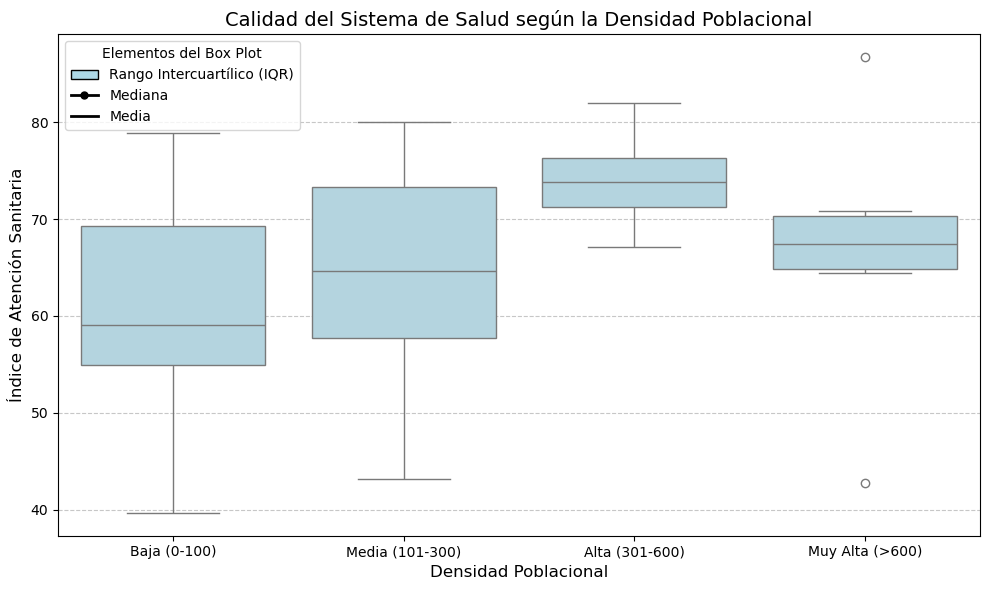

In [279]:
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Crear categorías de densidad poblacional
bins = [0, 100, 300, 600, float("inf")]
labels = ['Baja (0-100)', 'Media (101-300)', 'Alta (301-600)', 'Muy Alta (>600)']
health_care_population_density['Density Category'] = pd.cut(
    health_care_population_density['Density pop./km2'], bins=bins, labels=labels
)

# Crear el gráfico de box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Density Category', 
    y='Health Care Index', 
    color='lightblue',
    data=health_care_population_density,
    showmeans=False  # No mostrar la media como un punto
)

# Agregar la leyenda manualmente
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Rango Intercuartílico (IQR)'),
    Line2D([0], [0], color='black', lw=2, marker='o', markersize=5, label='Mediana'),
    Line2D([0], [0], color='black', lw=2, label='Media')  
]

plt.legend(handles=legend_elements, title='Elementos del Box Plot', loc='upper left')


# Configurar el título y etiquetas
plt.title("Calidad del Sistema de Salud según la Densidad Poblacional", fontsize=14)
plt.xlabel("Densidad Poblacional", fontsize=12)
plt.ylabel("Índice de Atención Sanitaria", fontsize=12)

# Mostrar grilla ligera en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar para que se vea todo correctamente
plt.tight_layout()
plt.show()


In [293]:
# Exportar los datos utilizados en el gráfico a un archivo CSV
columns_to_export5 = ['Country','Density pop./km2', 'Density Category', 'Health Care Index']
export_df5 = health_care_population_density[columns_to_export5]

# Guardar en un archivo CSV
export_df5.to_csv("AnalisisPreguntas/Pregunta5data.csv", index=False)

export_df5.head(10)


,Country,Density pop./km2,Density Category,Health Care Index
0,Singapore,7894.0,Muy Alta (>600),70.84
1,Hong Kong,6782.0,Muy Alta (>600),66.08
2,Malta,1510.0,Muy Alta (>600),68.81
3,Bangladesh,1169.0,Muy Alta (>600),42.80
4,Lebanon,672.0,Muy Alta (>600),64.38
5,Taiwan,652.0,Muy Alta (>600),86.71
6,South Korea,517.0,Alta (301-600),81.97
7,Netherlands,420.0,Alta (301-600),74.65
8,Israel,416.0,Alta (301-600),73.29
9,India,414.0,Alta (301-600),67.13


### Análisis y conclusión

In [ ]:
'''
De la figura resultante se desprende que a medida que aumenta la densidad poblacional, el índice de atención 
sanitaria tiende a ser mayor. Esto sugiere que, en promedio, las regiones con mayor densidad poblacional tienen 
sistemas de salud de mejor calidad.

A pesar de la tendencia general, existe una considerable variabilidad en la calidad de la atención sanitaria dentro
de cada categoría de densidad poblacional. Esto nos indica que otros factores además de la densidad poblacional 
influyen en la calidad del sistema de salud.

En cuanto a los valores atípicos que se visualizan como puntos blancos en el gráfico, su presencia nos sugiere que
hay algunos países que no siguen el patrón general. Por ejemplo, en la categoría de "Muy Alta (>600)" densidad 
poblacional, hay una región con un índice de atención sanitaria relativamente bajo y otro relativamente alto. 
Esto podría deberse a factores específicos de esa región, como problemas de infraestructura, falta de recursos o 
políticas de salud inadecuadas.

En cuanto a la pregunta original planteada de “Cómo varía la calidad del sistema de salud según la densidad 
poblacional” el gráfico sugiere que la densidad poblacional es un factor importante que influye en la calidad del 
sistema de salud. Sin embargo, no es el único factor. Otros factores como el nivel de desarrollo económico, la 
inversión en salud, la cobertura universal de salud, entre otros, también pueden jugar un papel importante.

'''


## Pregunta 6: ¿Cuáles son los países más accesibles para comprar vivienda considerando los índices económicos?

In [11]:
# Cargo datos de tabla restante
housing_df = pd.read_csv('RefinedData/RefData_Properties_price_index_by_countries_2020.csv') 


# Selección de columnas relevantes
housing_data = housing_df[['Country', 'Price To Income Ratio', 'Affordability Index', 'Gross Rental Yield City Centre']]
economic_data = cost_of_living[['Country', 'Local Purchasing Power Index']]

# Unir las tablas
housing_economic_data  = housing_data.merge(economic_data, on='Country', how='left')

housing_economic_data.head(10)


,Country,Price To Income Ratio,Affordability Index,Gross Rental Yield City Centre,Local Purchasing Power Index
0,Venezuela,133.29,0.03,6.22,2.61
1,Syria,60.83,0.15,2.71,11.46
2,Hong Kong,47.46,0.33,1.77,65.32
3,Cambodia,42.33,0.21,4.78,11.29
4,Kenya,31.63,0.21,2.15,27.32
5,Sri Lanka,31.14,0.21,2.88,24.45
6,China,29.06,0.43,1.71,60.88
7,Iran,25.11,0.19,4.92,22.69
8,Nepal,24.74,0.32,2.57,21.90
9,Philippines,24.60,0.42,3.44,23.48


In [15]:
housing_economic_data.shape

(103, 5)

In [17]:
housing_economic_data.duplicated().any()

False

In [21]:
housing_economic_data.isnull().sum()

Country                           0
Price To Income Ratio             0
Affordability Index               0
Gross Rental Yield City Centre    0
Local Purchasing Power Index      0
dtype: int64

In [23]:
housing_economic_data.describe()

,Price To Income Ratio,Affordability Index,Gross Rental Yield City Centre,Local Purchasing Power Index
count,103.000000,103.000000,103.000000,103.000000
mean,14.870097,1.155437,4.841942,55.174854
std,14.626980,0.788049,2.001457,27.145981
min,2.790000,0.030000,1.380000,2.610000
25%,8.955000,0.600000,3.395000,34.340000
50%,11.610000,1.000000,4.490000,47.220000
75%,15.365000,1.625000,5.895000,79.410000
max,133.290000,4.850000,11.360000,119.530000


In [20]:
##REVISAR CÓDIGO Y UNIFICAR CON EL DE ABAJO
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


#vieja: housing_economic

#nueva:  housing_economic_data 



# Identificar países más accesibles
# Ordenar por índice de asequibilidad descendente y relación precio-ingreso ascendente
top_accessible_countries = housing_economic_data.sort_values(by=['Affordability Index', 'Price To Income Ratio'], ascending=[False, True])

# Mostrar los 10 países más accesibles
top_10_accessible = top_accessible_countries.head(10)
top_10_accessible.head(10)



,Country,Price To Income Ratio,Affordability Index,Gross Rental Yield City Centre,Local Purchasing Power Index
102,Saudi Arabia,2.79,4.85,7.22,100.00
101,United States,3.52,3.79,10.36,109.52
100,Puerto Rico,3.53,3.67,9.34,79.38
96,United Arab Emirates,5.29,2.55,9.05,91.58
92,Belgium,6.91,2.42,4.92,86.28
91,Denmark,7.45,2.24,4.04,100.88
95,Qatar,5.82,2.21,7.19,111.69
98,Palestine,4.38,2.15,7.16,46.91
89,Netherlands,7.51,2.12,5.28,90.73
99,South Africa,3.93,2.11,9.85,73.61


In [ ]:
# Visualización: Gráfico de barras
#plt.figure(figsize=(10, 6))
#plt.bar(top_10_accessible['Country'], top_10_accessible['Affordability Index'], color='skyblue', label='Affordability Index')
#plt.xticks(rotation=45)
#plt.xlabel('Country')
#plt.ylabel('Affordability Index')
#plt.title('Top 10 Countries Most Accessible for Buying Housing')
#plt.legend()
#plt.tight_layout()
#plt.show()

In [131]:
print(housing_economic_data.columns)

Index(['Country', 'Price To Income Ratio', 'Affordability Index',
       'Gross Rental Yield City Centre', 'Local Purchasing Power Index'],
      dtype='object')


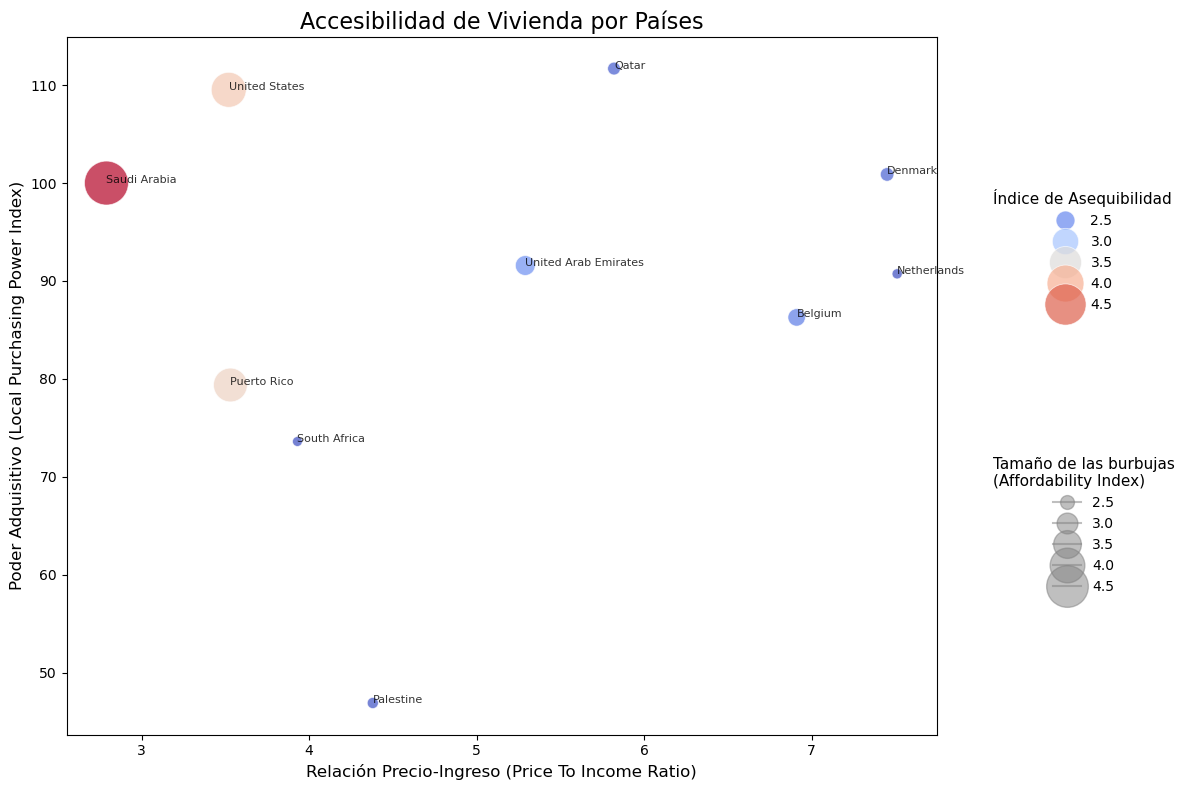

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=top_10_accessible,
    x='Price To Income Ratio',
    y='Local Purchasing Power Index',
    size='Affordability Index',
    hue='Affordability Index',
    palette='coolwarm',
    sizes=(50, 1000),
    alpha=0.7
)

# Ajustar el gráfico
scatter.set_title('Accesibilidad de Vivienda por Países', fontsize=16)
scatter.set_xlabel('Relación Precio-Ingreso (Price To Income Ratio)', fontsize=12)
scatter.set_ylabel('Poder Adquisitivo (Local Purchasing Power Index)', fontsize=12)

# Crear la leyenda para el tamaño de las burbujas
size_legend_handles = [
    plt.Line2D([0], [0], marker='o', color='gray', markersize=10, alpha=0.5, label='2.5'),
    plt.Line2D([0], [0], marker='o', color='gray', markersize=15, alpha=0.5, label='3.0'),
    plt.Line2D([0], [0], marker='o', color='gray', markersize=20, alpha=0.5, label='3.5'),
    plt.Line2D([0], [0], marker='o', color='gray', markersize=25, alpha=0.5, label='4.0'),
    plt.Line2D([0], [0], marker='o', color='gray', markersize=30, alpha=0.5, label='4.5')
]
size_legend = plt.legend(
    handles=size_legend_handles,
    title="Tamaño de las burbujas\n(Affordability Index)",
    loc='center left',
    bbox_to_anchor=(1.05, 0.3),  # Más abajo para separación
    fontsize=10,
    frameon=False  # Sin recuadro
)
size_legend.get_title().set_fontsize(11)

# Añadir la leyenda de índice de asequibilidad
bubble_legend = plt.legend(
    title="Índice de Asequibilidad",
    loc='upper left',
    bbox_to_anchor=(1.05, 0.8),  # Más arriba para separación
    fontsize=10,
    frameon=False  # Sin recuadro
)
bubble_legend.get_title().set_fontsize(11)

# Asegurar que ambas leyendas se agreguen correctamente
plt.gca().add_artist(size_legend)

# Mostrar etiquetas para los puntos
for line in range(0, top_10_accessible.shape[0]):
    plt.text(
        top_10_accessible['Price To Income Ratio'].iloc[line],
        top_10_accessible['Local Purchasing Power Index'].iloc[line],
        top_10_accessible['Country'].iloc[line],
        horizontalalignment='left',
        size=8,
        color='black',
        alpha=0.8
    )

plt.tight_layout()
plt.show()



In [22]:
# Guardar en un archivo CSV
top_10_accessible.to_csv("AnalisisPreguntas/Pregunta6data.csv", index=False)


### Análisis y conslusión 

In [ ]:
'''
Al estudiar la relación entre el índice de asequibilidad y el Price to income ratio a partir del procesamiento de 
los datos, vemos que Arabia Saudita posee el primer lugar en asequibilidad con un valor de 4.85. Además, analizando
el resto de los números podemos decir que Arabia Saudita lidera en accesibilidad debido a una combinación de precios
bajos y un poder adquisitivo adecuado (Price to Income Ratio de 2.79 y Poder Adquisitivo Local de 100).

	Como tendencia general los países con un menor Price to income ratio (2.79-3.93) suelen tener un índice de 
 asequibilidad alto, mayor a tres. Ejemplo, Arabia Saudita, Estados Unidos, y Puerto Rico. Los países como Dinamarca
 (7.45) y los Países bajos (7.51), con ratios más altos, presentan menores índices de asequibilidad (<2.3). 
 Esto podría indicar que una mayor proporción de ingresos destinados a la compra de vivienda disminuye la 
 asequibilidad.
	
Países con bajo Price to Income Ratio y un poder adquisitivo alto, como Arabia Saudita, tienen el mejor desempeño 
en asequibilidad. En cuanto al impacto de la estabilidad económica, países con altos precios relativos y bajos 
rendimientos de alquiler (Dinamarca y Países Bajos) son menos asequibles, incluso con un poder adquisitivo elevado. 
En cuanto a los países con bajo poder adquisitivo, ejemplo Palestina, enfrentan ciertos desafíos significativos de 
accesibilidad debido a ingresos insuficientes, a pesar de tener precios no tan elevados. 
'''

## Pregunta 7: ¿Cómo afecta la contaminación al índice de calidad de vida y salud?

In [34]:

health_care = pd.read_csv('RefinedData/RefData_Health_care_index_by_countries_2020.csv')


quality_of_life.head()

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61


In [40]:

print(health_care.shape, quality_of_life.shape)
health_care.head()

(93, 3) (80, 10)


,Country,Health Care Index,Health Care Exp. Index
0,Taiwan,86.71,159.66
1,South Korea,81.97,149.94
2,Japan,81.14,148.24
3,Denmark,80.00,147.47
4,France,79.99,146.81


In [56]:
health_care_quality  = quality_of_life.merge(health_care, on='Country', how='left')
print(health_care_quality.shape)
health_care_quality.head(10)

(80, 12)


,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index_x,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Health Care Index_y,Health Care Exp. Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80,80.00,147.47
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24,72.44,136.25
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87,75.79,138.01
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70,77.38,140.97
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61,74.65,136.05
5,Austria,182.50,82.38,76.27,78.73,70.38,10.88,26.27,22.19,77.30,78.73,144.24
6,Iceland,181.75,79.44,76.64,65.92,100.48,6.74,20.10,16.21,68.81,65.92,120.30
7,New Zealand,181.02,92.66,59.07,73.81,72.53,8.52,31.10,23.40,95.46,73.81,133.94
8,Germany,179.78,102.36,65.19,73.32,65.26,9.38,30.98,29.03,83.00,73.32,133.56
9,Estonia,177.82,71.30,76.86,72.67,50.93,9.06,24.53,19.81,64.28,72.67,132.90


In [58]:
health_care_quality_df=health_care_quality[['Country', 'Health Care Index_x', 'Quality of Life Index', 'Pollution Index']]
print(health_care_quality_df.isnull().sum())
print(health_care_quality_df.shape)
print(health_care_quality_df.duplicated().any())
print(health_care_quality_df.describe())
health_care_quality_df.head(10)




Country                  0
Health Care Index_x      0
Quality of Life Index    0
Pollution Index          0
dtype: int64
(80, 4)
False
       Health Care Index_x  Quality of Life Index  Pollution Index
count            80.000000              80.000000        80.000000
mean             64.840500             134.100375        53.227625
std               9.840011              33.921748        20.698200
min              42.800000              55.650000        11.550000
25%              56.357500             106.377500        36.157500
50%              66.000000             132.755000        57.125000
75%              72.565000             162.395000        67.435000
max              86.710000             192.670000        88.370000


,Country,Health Care Index_x,Quality of Life Index,Pollution Index
0,Denmark,80.00,192.67,21.33
1,Switzerland,72.44,192.01,22.39
2,Finland,75.79,190.22,11.55
3,Australia,77.38,186.21,23.46
4,Netherlands,74.65,183.67,27.41
5,Austria,78.73,182.50,22.19
6,Iceland,65.92,181.75,16.21
7,New Zealand,73.81,181.02,23.40
8,Germany,73.32,179.78,29.03
9,Estonia,72.67,177.82,19.81


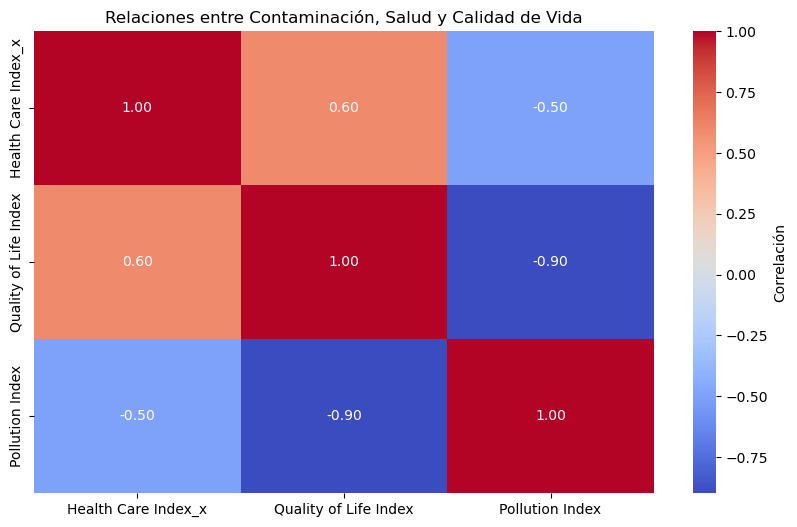

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar las columnas relevantes para el análisis
indices = health_care_quality_df[['Health Care Index_x', 'Quality of Life Index', 'Pollution Index']]

# Calcular la matriz de correlación
correlation_matrix = indices.corr()

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlación'}, fmt='.2f')

# Personalización del gráfico
plt.title('Relaciones entre Contaminación, Salud y Calidad de Vida')
plt.show()

In [60]:
# Guardar en un archivo CSV
health_care_quality_df.to_csv("AnalisisPreguntas/Pregunta7data.csv", index=False)

### Análisis y conclusiones

In [ ]:
'''
El heatmap refleja las correlaciones entre tres índices principales: Índice de Contaminación, Índice de Salud e Índice de Calidad de Vida. 
A partir de la matriz de correlación, se pueden identificar patrones importantes en los datos:

Índice de Contaminación vs. Índice de Calidad de Vida:
-	Correlación: -0.90 (negativa fuerte).

-	Interpretación: A medida que aumenta la contaminación en un país, el índice de calidad de vida disminuye significativamente. Esto sugiere 
que la contaminación tiene un impacto directo y muy negativo en la calidad de vida.

Índice de Contaminación vs. Índice de Salud:
-	Correlación: -0.50 (negativa moderada).

-	Interpretación: Una mayor contaminación también afecta negativamente al sistema de salud. Esto puede estar relacionado con un aumento en 
las enfermedades respiratorias, cardiovasculares y otros problemas asociados a la contaminación.

Índice de Salud vs. Índice de Calidad de Vida:
-	Correlación: +0.60 (positiva moderada).

-	Interpretación: Un sistema de salud robusto contribuye de manera importante a mejorar la calidad de vida. Este resultado confirma que una 
mejor atención médica y acceso a servicios de salud elevan los estándares de vida en general.

La contaminación no solo disminuye la calidad de vida de los ciudadanos, sino que también tiene un impacto en los sistemas de salud, posiblemente 
al incrementar la carga sobre ellos. Países con bajos índices de contaminación suelen tener sistemas de salud más eficientes y una mejor calidad de
vida, como se evidencia en la tabla (ej., Dinamarca, Finlandia, Suiza). Por otro lado, países con índices de contaminación elevados, como Egipto, 
Nigeria o Bangladesh, tienden a tener menores índices de calidad de vida y sistemas de salud más débiles.

A modo de conclusión, a partir de los datos recolectados por país se puede afirmar que la contaminación es un factor crítico que afecta negativamente 
tanto la salud pública como la calidad de vida. Las políticas para reducir la contaminación no solo tienen beneficios ambientales, sino que también 
mejoran significativamente las condiciones de vida y alivian la presión sobre los sistemas de salud. Países que logran mantener bajos niveles de 
contaminación pueden mejorar ambos índices de manera simultánea, como se observa en los datos de países como Dinamarca y Finlandia.

'''

## Pregunta 8: ¿Qué países destacan por su equilibrio entre calidad de vida, salud, seguridad y vivienda?

In [70]:
# Veo las dimensiones de las tablas a usar y elijo la que tiene menos entrdas para continuar como tabla base del merge
print(quality_of_life.shape,health_care.shape,crime_safe.shape,housing_df.shape)

(80, 10) (93, 3) (128, 3) (103, 8)


In [74]:
grafTelarania = quality_of_life.merge(health_care, on="Country", how="inner") \
                           .merge(crime_safe, on="Country", how="inner") \
                           .merge(housing_df, on="Country", how="inner")

# Información de la tabla resultante
print("Dimensiones del dataframe resultante:", grafTelarania.shape)
grafTelarania.head()

Dimensiones del dataframe resultante: (79, 21)


,Country,Quality of Life Index,Purchasing Power Index,Safety Index_x,Health Care Index_x,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,...,Health Care Exp. Index,Crime Index,Safety Index_y,Price To Income Ratio,Gross Rental Yield City Centre,Gross Rental Yield Outside of Centre,Price To Rent Ratio City Centre,Price To Rent Ratio Outside Of City Centre,Mortgage As A Percentage Of Income,Affordability Index
0,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80,...,147.47,25.10,74.90,7.45,4.04,4.07,24.77,24.58,44.56,2.24
1,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24,...,136.25,21.60,78.40,8.68,2.97,3.28,33.71,30.49,50.83,1.97
2,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87,...,138.01,23.32,76.68,8.35,3.30,4.28,30.34,23.37,48.10,2.08
3,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70,...,140.97,41.36,58.64,7.52,4.47,4.67,22.35,21.43,55.61,1.80
4,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61,...,136.05,27.62,72.38,7.51,5.28,5.56,18.93,17.98,47.12,2.12


In [76]:
grafTelarania.columns

Index(['Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index_x', 'Health Care Index_x', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'Health Care Index_y',
       'Health Care Exp. Index', 'Crime Index', 'Safety Index_y',
       'Price To Income Ratio', 'Gross Rental Yield City Centre',
       'Gross Rental Yield Outside of Centre',
       'Price To Rent Ratio City Centre',
       'Price To Rent Ratio Outside Of City Centre',
       'Mortgage As A Percentage Of Income', 'Affordability Index'],
      dtype='object')

In [78]:
# filtro la tabla obtenida por los campos que usaré 

grafTelaraniaFiltrada= grafTelarania[['Country','Quality of Life Index','Health Care Index_y','Safety Index_y','Affordability Index']]


grafTelaraniaFiltrada.head(10)



,Country,Quality of Life Index,Health Care Index_y,Safety Index_y,Affordability Index
0,Denmark,192.67,80.00,74.90,2.24
1,Switzerland,192.01,72.44,78.40,1.97
2,Finland,190.22,75.79,76.68,2.08
3,Australia,186.21,77.38,58.64,1.80
4,Netherlands,183.67,74.65,72.38,2.12
5,Austria,182.50,78.73,76.27,1.50
6,Iceland,181.75,65.92,76.64,1.68
7,New Zealand,181.02,73.81,59.07,1.53
8,Germany,179.78,73.32,65.19,1.78
9,Estonia,177.82,72.67,76.86,1.75


In [84]:
print(grafTelaraniaFiltrada.shape)
print(grafTelaraniaFiltrada.duplicated().any())
print(grafTelaraniaFiltrada.isnull().sum())

(79, 5)
False
Country                  0
Quality of Life Index    0
Health Care Index_y      0
Safety Index_y           0
Affordability Index      0
dtype: int64


In [88]:
grafTelaraniaFiltrada.describe()

,Quality of Life Index,Health Care Index_y,Safety Index_y,Affordability Index
count,79.000000,79.000000,79.000000,79.000000
mean,135.093418,65.008228,61.393671,1.208481
std,32.947461,9.787119,13.604895,0.789344
min,70.030000,42.800000,22.510000,0.100000
25%,107.460000,56.985000,53.685000,0.610000
50%,133.070000,66.080000,60.330000,1.020000
75%,162.500000,72.600000,72.170000,1.685000
max,192.670000,86.710000,88.140000,4.850000


In [90]:
# Guardar en un archivo CSV
grafTelaraniaFiltrada.to_csv("AnalisisPreguntas/Pregunta8data.csv", index=False)

In [98]:
# Filtrar los países que cumplen con los criterios
equilibrioPregunta8_df = grafTelaraniaFiltrada[
    (grafTelaraniaFiltrada["Quality of Life Index"] >= 133.07) &
    (grafTelaraniaFiltrada["Health Care Index_y"] >= 66.08) &
    (grafTelaraniaFiltrada["Safety Index_y"] >= 60.33) &
    (grafTelaraniaFiltrada["Affordability Index"] >= 1.02)
].reset_index(drop=True)

# Mostrar los países destacados
print("Países destacados por su equilibrio:")


# Verificar dimensiones del DataFrame
print(f"Total de países destacados: {equilibrioPregunta8_df.shape[0]}")
equilibrioPregunta8_df.head(20)

Países destacados por su equilibrio:
Total de países destacados: 16


,Country,Quality of Life Index,Health Care Index_y,Safety Index_y,Affordability Index
0,Denmark,192.67,80.00,74.90,2.24
1,Switzerland,192.01,72.44,78.40,1.97
2,Finland,190.22,75.79,76.68,2.08
3,Netherlands,183.67,74.65,72.38,2.12
4,Austria,182.50,78.73,76.27,1.50
5,Germany,179.78,73.32,65.19,1.78
6,Estonia,177.82,72.67,76.86,1.75
7,Norway,175.19,74.36,64.57,1.75
8,Spain,169.82,78.88,68.04,1.70
9,Japan,167.99,81.14,79.34,1.33


In [116]:
equilibrioPregunta8_df.to_csv("AnalisisPreguntas/Pregunta8PaisesEquilibradosdata.csv", index=False)

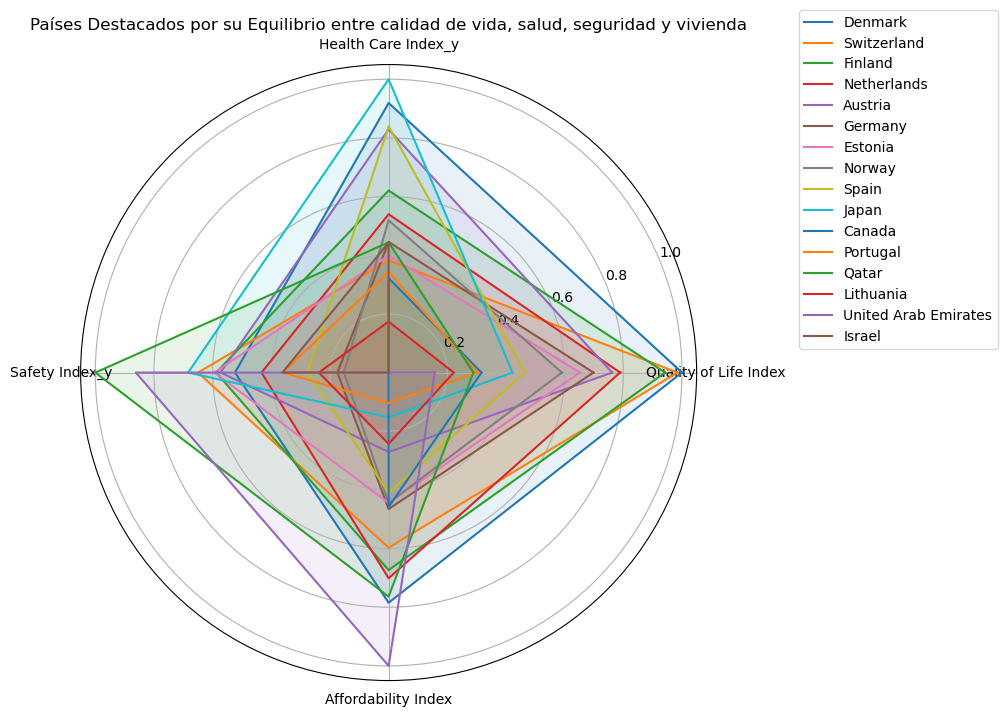

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# --- Paso 1: Crear DataFrame con datos hipotéticos ---
# Incluye datos de calidad de vida, salud, seguridad, vivienda


# --- Paso 2: Normalizar los datos ---
# Para evitar distorsiones, normalizamos cada columna (escala 0-1)
normalized_df = equilibrioPregunta8_df.copy()
columns_to_normalize = ['Quality of Life Index','Health Care Index_y','Safety Index_y','Affordability Index']
for column in columns_to_normalize:
    normalized_df[column] = (equilibrioPregunta8_df[column] - equilibrioPregunta8_df[column].min()) / (equilibrioPregunta8_df[column].max() - equilibrioPregunta8_df[column].min())

# --- Paso 3: Crear radar chart ---
categories = ['Quality of Life Index','Health Care Index_y','Safety Index_y','Affordability Index']
N = len(categories)

# Añadir el primer valor al final de cada fila para cerrar el gráfico
values_list = normalized_df[categories].values.tolist()
for values in values_list:
    values.append(values[0])

# Crear el radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, values in enumerate(values_list):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax.plot(angles, values, label=equilibrioPregunta8_df["Country"][i])
    ax.fill(angles, values, alpha=0.1)

# Configuración del radar chart
ax.set_xticks([n / float(N) * 2 * pi for n in range(N)])
ax.set_xticklabels(categories)
plt.legend(
    loc="upper right",  # Posición base de la leyenda
    bbox_to_anchor=(1.5, 1.1)  # Ajusta las coordenadas para moverla
)
plt.title("Países Destacados por su Equilibrio entre calidad de vida, salud, seguridad y vivienda")
plt.show()

### Análisis y conclusiones

In [ ]:
'''
Muchas líneas de los países están bastante cercanas entre sí, indicando que los valores de estos índices no son significativamente 
diferentes entre los países representados. Esto puede reflejar que los países seleccionados pertenecen a un grupo homogéneo (países 
con un alto desarrollo humano o economías avanzadas).

Algunos países, como Qatar y Emiratos Árabes Unidos, tienen valores más altos en el índice de asequibilidad ("Affordability Index") 
pero caen en otros índices como la Seguridad o la Calidad de Vida. Países como Japón y Dinamarca tienen valores equilibrados en la 
mayoría de los índices, con diferencias mínimas entre sus dimensiones.

Quality of Life Index: Tiende a ser alto y consistente entre la mayoría de los países.

Safety Index: Hay mayor variabilidad; algunos países, como Japón, destacan con valores relativamente altos, mientras que otros, como 
Canadá, están en la parte baja.

Health Care Index_y: Es uno de los índices más consistentes, con pocos países destacándose claramente.

Affordability Index: Tiene la mayor variabilidad, lo que podría reflejar diferencias significativas en el costo de vida o el acceso a 
bienes y servicios básicos.

Las disparidades en "Affordability Index" podrían estar influenciadas por factores económicos locales, como subsidios, costos de vida o 
ingresos promedio en cada país.

Países con un bajo índice de "Safety Index" podrían priorizar políticas de seguridad.

Países con bajo "Affordability Index" deben analizar cómo mejorar el acceso económico a recursos básicos para su población.

A modo de conclusión se podría decir que la mayoría de los países seleccionados muestran un buen balance en los índices considerados, lo 
que refleja que estos países ofrecen altos estándares de vida en general cumpliendo así con la premisa de la pregunta. 

'''